In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Stress-Lysis.csv')
data.head()

,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


Data Preparation

In [3]:
data.shape

(2001, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step_count    2001 non-null   int64  
 3   Stress_Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Humidity,2001.0,20.000000,5.777833,10.0,15.0,20.0,25.0,30.0
Temperature,2001.0,89.000000,5.777833,79.0,84.0,89.0,94.0,99.0
Step_count,2001.0,100.141429,58.182948,0.0,50.0,101.0,150.0,200.0
Stress_Level,2001.0,1.104448,0.771094,0.0,0.0,1.0,2.0,2.0


In [8]:
data.isnull().sum()

Humidity        0
Temperature     0
Step_count      0
Stress_Level    0
dtype: int64

In [9]:
data.duplicated().sum()

0

Exploratory Data Analysis

In [10]:
data['Stress_Level'].unique()

array([1, 2, 0], dtype=int64)

In [12]:
data['Stress_Level'].value_counts()

1    790
2    710
0    501
Name: Stress_Level, dtype: int64

In [14]:
data.skew()

Humidity        1.179993e-18
Temperature    -1.297993e-17
Step_count     -6.998237e-03
Stress_Level   -1.811032e-01
dtype: float64

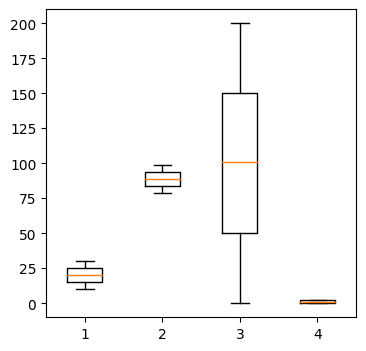

In [15]:
plt.figure(figsize=(4,4))
plt.boxplot(data)
plt.show()

In [17]:
# Transformasi Logaritma
hum_log = np.log(data['Humidity'])
humadity = round(hum_log.skew(), 10)

print(humadity)

-0.3790364332


In [18]:
# Transformasi SquareRoot
temp_sqrt = np.sqrt(data['Temperature'])
temp_sqrt.skew()

temperature = round(temp_sqrt.skew(), 10)
print(temperature)

-0.0390881104


In [19]:
Q1 = data['Step_count'].quantile(0.25)
Q2 = data['Step_count'].quantile(0.75)

In [20]:
Q1

50.0

In [21]:
Q2

150.0

In [22]:
data['Step_count'] = np.where(data['Step_count']<Q1, Q1, data['Step_count'])
data['Step_count'] = np.where(data['Step_count']>Q2, Q2, data['Step_count'])

In [23]:
step_count = round(data['Step_count'].skew(), 10)
print(step_count)

-0.0094975784


In [24]:
# Transformasi SquareRoot
stress_sqrt = np.sqrt(data['Stress_Level'])
SL = round(stress_sqrt.skew(), 10)

print(SL)

-0.7944935599


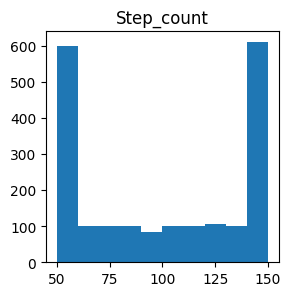

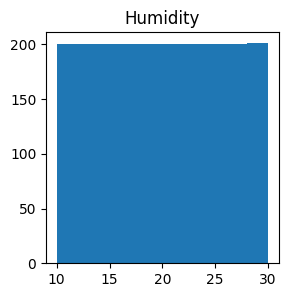

In [25]:
column=['Step_count','Humidity']
for category in column:
    plt.figure(figsize=(3,3))
    plt.hist(data[category])
    plt.title(category)
    plt.show()

<AxesSubplot: xlabel='Stress_Level', ylabel='Count'>

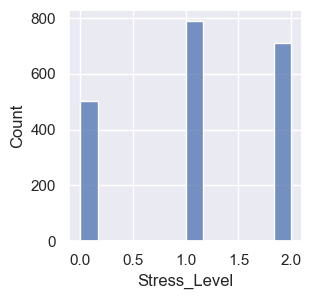

In [26]:
plt.figure(figsize=(3,3))
sns.set(font_scale=1)
sns.histplot(data=data, x='Stress_Level')

<AxesSubplot: >

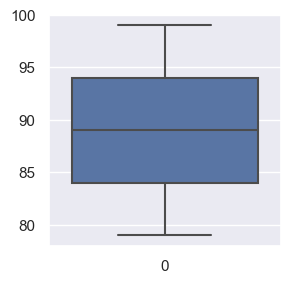

In [27]:
plt.figure(figsize=(3,3))
sns.boxplot(data['Temperature'])